In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Intro 

My chosen dataset is a set of data detailing the global temperatures data of the earth and various sub-regions of the earth, from the year 1999 to 2022. The data is a compilation of temperature data taken from a total of 15 different satellites. I used kaggle.com to pick a reliable dataset, knowing this was a trustworthy source, and decided on a temperature related dataset due to my own personal interests in climate change.

Because of the large volume of data in this dataset due to the 15 different regions of temperature data, i have chosen to negate some of the columns that provided data on subregions of regions already covered in the data. The remaining columns provide temperature data on the land and ocean temperatures of the entire Globe, the northern hemisphere, the southern hemisphere, the north pole and the south pole.

The first two columns show the year and month of the recorded data respectively, running from December 1999 to July 2022. Each set of three columns following this will show the temperature recorded overall for a region-for example the third column shows the average temperature of the entire globe-followed by a column of the average temperature on land for that region, and a column for the average ocean temperature for that region. There are 17 columns total.

Interestingly, the temperature values of the data is not shown as just the raw temperature data, but rather is presented as the departure in temperature from an average of the temperatures from 1991 to 2020 (in +- degrees celsius).This makes it easier to identify trends in how the global temperature has changed overtime. All of the data takes the form of either integer or floating point values, apart from the very first row, which consists of labels of the columns, and so contains string values.


## Part 1.

To hold the information of my dataset, i've chosen to use a 3 level nested dictionary containing 3-element tuples. The first dictionary will contain keys corresponding to each year of data i have. Each of these year keys will contain a second dictionary that contains keys corresponding to each month of that year, from 1-12 (or 12 and 1-6 for the years 1999 and 2022). Each of these number keys will contain keys corresponding to the various regions ie. globe, northern hemisphere etc. Finally, each region key corresponds to a 3-element tuple that contains the temperature data for the overall region,land and ocean of that region respectively. 

I have chosen to represent the data in this way as it is the most efficient and straightforward way to access all aspects of the data. The use of multiple dictionaries allows the data to be accessed using various keys. My chose of the 3-element tuple is related to the fact that all of my regions have the same 3 categories of temperature data. This means there will always be 3 elements of data related to each region, and this will never be altered. Use of a tuple also allows me to unpack the data and assign the three values to their respective category (overall, land and ocean) without the use of a copious amount of nested dictionaries or assignment statements.

An example of the data structure i plan to use for my dataset is detailed below, as well as an example of how one would access various elements of the data.

In [1]:
#Example data structure for the months of January and February in the year 1979
tempData = {'1979':{'1':{'Globe':(-0.48,-0.51,-0.47),'NH':(-0.44,-0.46,-0.42),'SH':(-0.52,-0.62,-0.5),'Trpcs':(-0.6,-0.62,-0.59),
'NoPol':(-0.39,-0.68,-0.06),'SoPol':(-0.45,-0.38,-0.49)},'2':{'Globe':(-0.43,-0.56,-0.39),'NH':(-0.47,-0.57,-0.41),
'SH':(-0.39,-0.53,-0.37),'Trpcs':(-0.36,-0.43,-0.34),'NoPol':(-0.56,-0.47,-0.65),'SoPol':(-0.52,-1.25,-0.18)}}}

#To access the information about a particular month, in this case January 1979
print(tempData['1979']['1'])

{'Globe': (-0.48, -0.51, -0.47), 'NH': (-0.44, -0.46, -0.42), 'SH': (-0.52, -0.62, -0.5), 'Trpcs': (-0.6, -0.62, -0.59), 'NoPol': (-0.39, -0.68, -0.06), 'SoPol': (-0.45, -0.38, -0.49)}


In [3]:
#To access data on a specific region, eg the temperature data on land for the entire globe in February 1979
tuples = tempData['1979']['2']['Globe']
(overall,land,ocean) = tuples
print('temp departure from average for land of the entire globe, Feb 1929:',land)

temp departure from average for land of the entire globe, Feb 1929: -0.56



There are many other data structures that could have been utilised here. A list of nested dictionaries would have also been a suitable choice, however this would require use of an index rather than a key to access the required year. This may work fine for earlier years, as it is easy to see that 1999 would correspond to index [0], 2000 to index [1], so on and so forth. However, as the years go on, it may become confusing to work out which index corresponds to which year. Furthermore, a list can be easily appended


Another alternative data structure could have seen use of a 3-element list as oppose to a 3-element tuple. Again, this would work technically, but when unpacking the data, would require multiple assignment statement in order to allocate each item of the list to the overall, land and ocean label. The use of the 3-element tuple allows me to unpack and assign the 3 elements of data to their respective labels in just 2 lines of code, which is much more efficient and less likely to produce error. Tuples also make it easier to spot any errors in the dataset when producing the structure, as the tuple has a set size of 3 elements, so if there is any data missing from our set, an error will occur when unpacking the data. This could not happen with a list.

Below is the function created to read in my data set and add it to the data structure outlined above in part 2. 

In [4]:
#Defining a function that takes a csv file as an argument and returns a dictionary of dictionaries
def read_data(filename):
#We start by opening the file
#We use an error handler to prevent a FileNotFoundError from occuring if the filename cannot be read. instead, the user is asked to input a new filename until the file can be read.
    f = ''
    while f == '':
        try: 
            f = open(filename)
        except FileNotFoundError:
            print("File: " + filename + " could not be opened.")
            filename = input("Please provide a new data file to continue: ")
    #Precondition
    assert f != "", 'file must contain data'
#We open the csv file and read the first and second line of the file. These lines contains the title and the headers
#We don't need the title, so we don't do anything with this line
#We create a list of the headers. This allows us to access the region headers later to create keys in our dictionary
    title = f.readline()
    header = f.readline()
    headerList = header.split(sep = ',')
    dataStruct = {}
    line = f.readline()
#We make a new dictionary entry to our data structure for each year 
    while line!= "": 
        newline = line.split(sep = ',')
        dataStruct[newline[0]] = {}
        yearDict = {}
#Create an entry for the yearDict for each month, which contains an empty dictionary
        while (newline[0] in dataStruct) == True:
            yearDict[newline[1]] = {}
            monthDict = {}
            count = 2
            headerNumber = 2
            while count <= 14:
                if count == 14:
                    monthDict[headerList[headerNumber]] = (newline[count],newline[count+1],newline[count+2][:-1])
                    headerNumber = headerNumber + 3
                    count = count + 3 
                else:
                    monthDict[headerList[headerNumber]] = (newline[count],newline[count+1],newline[count+2])
                    headerNumber = headerNumber + 3
                    count = count + 3
            yearDict[newline[1]] = monthDict
            dataStruct[newline[0]] = yearDict
            line = f.readline()
            newline = line.split(sep = ',')
    f.close()
    
    #Postconditions
    assert isinstance(dataStruct, dict), 'Final output should be a 3-level nested dictionary'
    for a in dataStruct:
        assert isinstance(dataStruct[a], dict), 'Final output should be a 3-level nested dictionary'
        assert len(dataStruct[a]) <= 12, 'Each year should not contain more than 12 month keys'
        for b in dataStruct[a]:
            assert isinstance(dataStruct[a][b], dict), 'Final output should be a 3-level nested dictionary'
            assert len(dataStruct[a][b]) == 5, 'Each month should contain 5 keys to represent the five different regions'
            for c in dataStruct[a][b]:
                assert isinstance(dataStruct[a][b][c], tuple), 'Each region key should contain a single tuple'
    return dataStruct

#I have printed out the data structure i have produced from my dataset to check the data matches:
finalData = read_data('ClimateDataFinal.csv')
print(finalData)

{'1999': {'12': {'Globe': ('-0.16', '-0.05', '-0.21'), 'NH': ('-0.01', '0.32', '-0.22'), 'SH': ('-0.32', '-0.88', '-0.2'), 'NoPol': ('-0.56', '-0.11', '-1.08'), 'SoPol': ('-1.2', '-2.48', '-0.58')}}, '2000': {'1': {'Globe': ('-0.41', '-0.53', '-0.37'), 'NH': ('-0.42', '-0.41', '-0.43'), 'SH': ('-0.4', '-0.8', '-0.32'), 'NoPol': ('-1.08', '-1.04', '-1.12'), 'SoPol': ('-1.44', '-2.08', '-1.14')}, '2': {'Globe': ('-0.23', '-0.19', '-0.24'), 'NH': ('-0.3', '-0.1', '-0.42'), 'SH': ('-0.16', '-0.39', '-0.11'), 'NoPol': ('0.11', '0.46', '-0.31'), 'SoPol': ('-0.34', '-0.9', '-0.08')}, '3': {'Globe': ('-0.14', '-0.19', '-0.12'), 'NH': ('-0.23', '-0.1', '-0.31'), 'SH': ('-0.05', '-0.39', '0.02'), 'NoPol': ('0.21', '0.21', '0.21'), 'SoPol': ('-0.45', '-1', '-0.19')}, '4': {'Globe': ('-0.07', '0.23', '-0.19'), 'NH': ('0.02', '0.45', '-0.25'), 'SH': ('-0.16', '-0.26', '-0.14'), 'NoPol': ('0.16', '0.59', '-0.34'), 'SoPol': ('-0.67', '-0.51', '-0.74')}, '5': {'Globe': ('-0.04', '-0.05', '-0.03'), 'NH

## Part 2

Next I have i have defined a function which takes one of the five regions as an arguement to the function, and returns the overall, land and ocean data for each month and year of that region, in the form of a 2-level nested dictionary containing 3-element tuples.

I have then defined a function which takes an average of either the overall, land or ocean temperature data over each years 12 months for a chosen region. This is returned in the form of a dictionary of integers. 


In [5]:
#Here i have defined a function which takes one of the five regions as an arguement to the function, and returns the overall, land and ocean data for each month and year of that region, in the form of a 2-level nested dictionary containing 3-element tuples.
def filter_by_characteristic(dataStruct,region):
    #Preconditions 
    assert isinstance(dataStruct, dict), 'data structure must be a 3-level nested dictionary'
    assert isinstance(region, str), 'region input must be a string value'
    
#We create a new dictionary called newDict, which will store our new subset of data and return it at the end
    newDict = {}
    for count in dataStruct:
        #Preconditiona
        assert isinstance(dataStruct[count], dict),'data structure must be a 3-level nested dictionary'
        
#We create a second new dictionary called monthDict, which will store the 3-element tuple for our region for each month of the year
        monthDict = {}
        for i in dataStruct[count]:
            #Preconditions
            assert isinstance(dataStruct[count][i], dict),'data structure must be a 3-level nested dictionary'
            
            #We add an error handler here to catch if a region has been input that is not one of the 5 in the dictionary
            #In this case, the program asks the user to try another region input
            try:
                regionDict = dataStruct[count][i][region]
                monthDict[i] = regionDict
            except KeyError:
                print('region',region,'is not a valid entry')
                region = input('please provide a new region key to continue:')
                
#We then create an entry for each year in the new dictionary that corresponds to the dictionary of tuples for each month of that year
        newDict[count] = monthDict
        #Postconditions
        assert isinstance(newDict, dict), 'Final output should be a dictionary of dictionaries'
        for check in newDict:
            assert isinstance(newDict[check], dict), 'Final output should be a dictionary of dictionaries'
            for checking in newDict[check]:
                assert isinstance(newDict[check][checking], tuple), 'Final outputs nested dictionary keys should contain 3-element tuples'
    return newDict

#A test case below to check the function works correctly
filter_by_characteristic(finalData,'NoPol')          

{'1999': {'12': ('-0.56', '-0.11', '-1.08')},
 '2000': {'1': ('-1.08', '-1.04', '-1.12'),
  '2': ('0.11', '0.46', '-0.31'),
  '3': ('0.21', '0.21', '0.21'),
  '4': ('0.16', '0.59', '-0.34'),
  '5': ('-0.48', '-0.55', '-0.41'),
  '6': ('-0.39', '-0.17', '-0.63'),
  '7': ('-0.01', '0.03', '-0.06'),
  '8': ('-0.1', '-0.31', '0.14'),
  '9': ('-0.48', '-0.45', '-0.52'),
  '10': ('0.02', '-0.21', '0.28'),
  '11': ('0.2', '0.18', '0.23'),
  '12': ('0.03', '-0.18', '0.26')},
 '2001': {'1': ('-0.25', '-0.36', '-0.12'),
  '2': ('-0.34', '-0.72', '0.09'),
  '3': ('-0.17', '0.09', '-0.48'),
  '4': ('-0.45', '-0.23', '-0.71'),
  '5': ('-0.08', '0.1', '-0.28'),
  '6': ('0.02', '0.19', '-0.16'),
  '7': ('0.11', '0.39', '-0.21'),
  '8': ('0.49', '0.65', '0.32'),
  '9': ('0.1', '-0.16', '0.39'),
  '10': ('-0.66', '-0.57', '-0.76'),
  '11': ('-0.27', '-0.03', '-0.56'),
  '12': ('0.65', '0.54', '0.78')},
 '2002': {'1': ('-0.08', '0.1', '-0.3'),
  '2': ('-1.6', '-0.97', '-2.32'),
  '3': ('0.73', '0.47', '

In [6]:

#Here i have defined a function which takes an average of either the overall, land or ocean temperature data over each years 12 months for a chosen region. This is returned in the form of a dictionary of integers. 
#The dataStruct parameter takes a data structure, the region is one of the 5 regions of our dataset and category is either overall, land or ocean. 
def aggregate_by_characteristic(dataStruct,region,category):    
    #Precondition
    assert isinstance(dataStruct,dict), 'dataStructure must be in the form of a 3-level nested dictionary'
    
#We create an empty dictionary, which we will add to and return at the end, and an empty list which we append the integers we intend to aggregate to
    newDict = {}
    for count in dataStruct:
        #Precondition
        assert isinstance(dataStruct[count],dict), '2dataStructure must be in the form of a 3-level nested dictionary'
        
        newList = []
        for i in dataStruct[count]:
            #Preconditions
            assert isinstance(dataStruct[count][i],dict), '3dataStructure must be in the form of a 3-level nested dictionary'
            
#For each month of each the year, we then unpack the tuple from the region input in the function, and append the dataType input in the function to newList
#Similar to the previous function, we add an error catcher here to catch if an invalid region has been input 
#In this case, the program will ask the user to input another argument for the region
            tuple3 = 0
            while tuple3 == 0:
                try:
                    oldDict = dataStruct[count][i]
                    tuple3 = oldDict[region]
                    #Precondition
                    assert isinstance(dataStruct[count][i][region], tuple), 'data entries for region must be in the form of a 3-element tuple'
                    (overall,land,ocean) = tuple3
#We then select which data to add to our new data structure depending on the category input by the user.
#If the user has selected an invalid category, we have added an else statement that will allow them to input a new category.
#Note that we have not used try and except for this scenario, as an incorrect category will not throw an error, but will not produce the correct output either.
                    counter = len(newList)
                    while counter == len(newList):
                        if category == 'overall':
                            newList.append(overall)
                        elif category == 'land':
                            newList.append(land)
                        elif category == 'ocean':
                            newList.append(ocean)
                        else:
                            category = input('category invalid. please select either overall, land or ocean:')
                except KeyError:
                    print('region',region,'is not a valid entry')
                    region = input('please provide a new region key to continue:')
        
#We then sum the contents of newList
        sum = 0
        x = len(newList)
        for y in range(x):
            sum = sum + float(newList[y])
        aggregate = sum/x
#We create a key in our new dictionary for each year, corresponding to the aggregate total we have calculated
#We then return our new dictionary once the nested for loop has ended
#Note that the round function has been used to take all values to 2 decimal places
        newDict[count] = round(aggregate,2)
    
        #Postconditions
        assert isinstance(newDict,dict), 'Final output should be a dictionary'
        for count in newDict:
            assert isinstance(newDict[count],float), 'each dictionary key should correspond to a single aggregate floating point value'
    return newDict

#A test case below to check the function works correctly:        
aggregate_by_characteristic(finalData,'NoPol','land')

{'1999': -0.11,
 '2000': -0.12,
 '2001': -0.01,
 '2002': -0.05,
 '2003': 0.18,
 '2004': -0.3,
 '2005': 0.43,
 '2006': -0.04,
 '2007': 0.03,
 '2008': -0.13,
 '2009': -0.21,
 '2010': 0.49,
 '2011': -0.04,
 '2012': 0.27,
 '2013': -0.08,
 '2014': 0.12,
 '2015': -0.01,
 '2016': 0.86,
 '2017': 0.46,
 '2018': 0.29,
 '2019': 0.47,
 '2020': 0.38,
 '2021': 0.15,
 '2022': 0.43}

## Part 3: Plotting 
I have first defined a function that takes the filtered 'filtered_by_characteristic' dataset, and takes the overall temperature for each month and produces an average for each year over the 12 months, returned in the form of a dictionary, in order to then create a scatter plot.

Next, i have defined a function below similar to the aggregate by characteristic, except instead of taking an average across the 12 months, it takes a list of the temperature data for overall per year and returns a dictionary of lists with the year as keys, allowing me to plot a histogram showing the most common values for the temperature departure from average for any of the regions and categories of our choosing

Finally, I've chosen to create bar plots that show how the global temperature departure from average changes month to month for a specified year.


In [7]:
#I have first defined a function that takes the filtered 'filtered_by_characteristic' dataset, and takes the overall temperature for each month and produces an average for each year over the 12 months, returned in the form of a dictionary. 
#This is the data we will be plotting
#This allows us to view trends in how temperature has changed over the years for the 5 different regions, depending on which characteristic we have chosen for the aggregate

def aggregate_months_overall(dataSet):
    newDict = {}
    for count in dataSet:
        newList = []
        for i in dataSet[count]:
            (overall,land,ocean) = dataSet[count][i]
            newList.append(float(overall))
        sum = 0
        x = len(newList)
        for y in range(x):
            sum = sum+newList[y]
        newDict[count] = round(sum/x,2)
    return newDict



In [8]:
#I have then defined my scatter function, which will take the dataSet produced by 'aggregate_months_overall', as well as the region and produce a scatter function with a line of best fit
def scatter(filteredData,region):
#We start by creating an x-value and y-value array from our filtered data
#Our x-values will be our years
#Our y-values will be our aggregate overall temperature data each year
#These two arrays are what we will use to produce our scatter plot
    x = []
    y = []
    for count in filteredData:
        x.append(int(count))
        y.append(float(filteredData[count])) 
#We have set the figsize to (10,10) so the plot is easily readable, and have added a grid to make values easier to identify
    plt.figure(figsize=(15,8))
    plt.grid(True)
#We then use the plt.scatter and plt.   
    plt.plot(x,y)
#The x and y axis have been set so the scales make maximum use of the plot space
    plt.ylim(-1,1)
    plt.xlim(1999,2022)
#We have also added a title and x and y-axis labels, and made them an appropriate fontSize
    plt.title('Temperature departure from 1991-2022 average by year ('+region+')', fontsize = 20)
    plt.xlabel('Year', fontsize = 20)
    plt.ylabel('Temperature departure (+-degrees celsius)', fontsize = 20)
    plt.show()

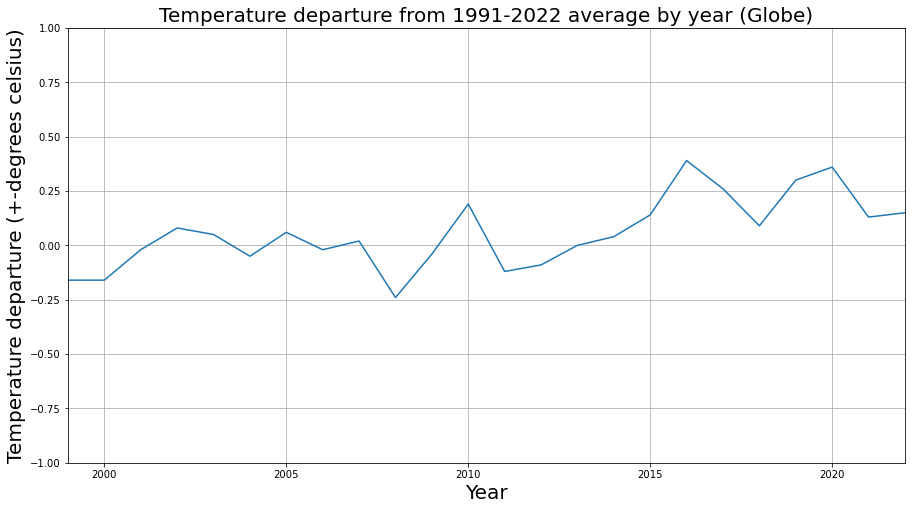

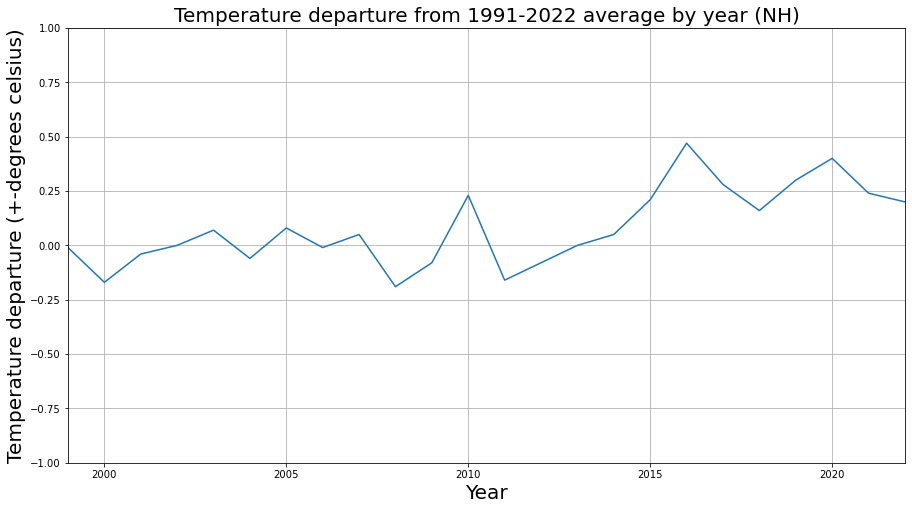

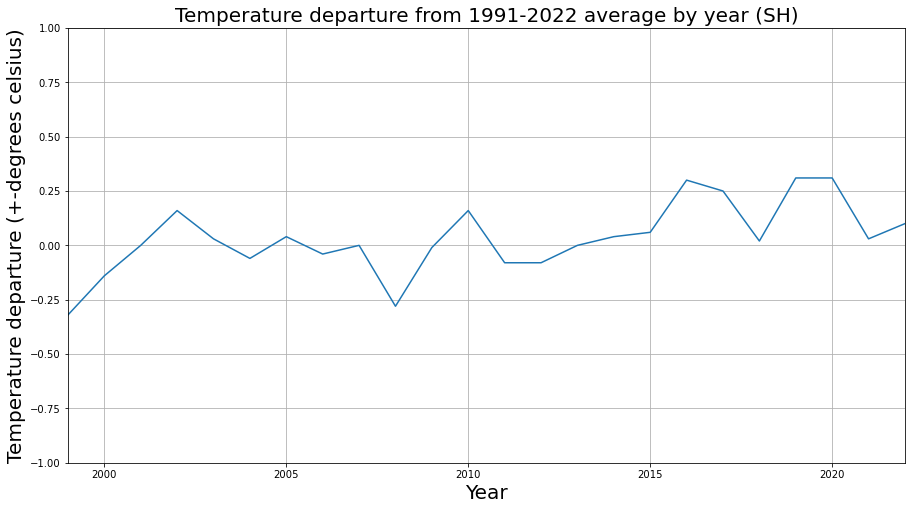

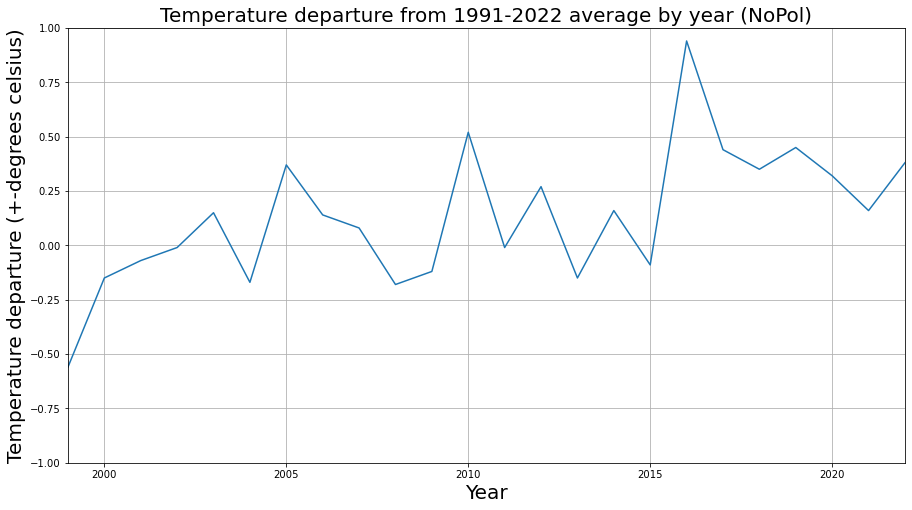

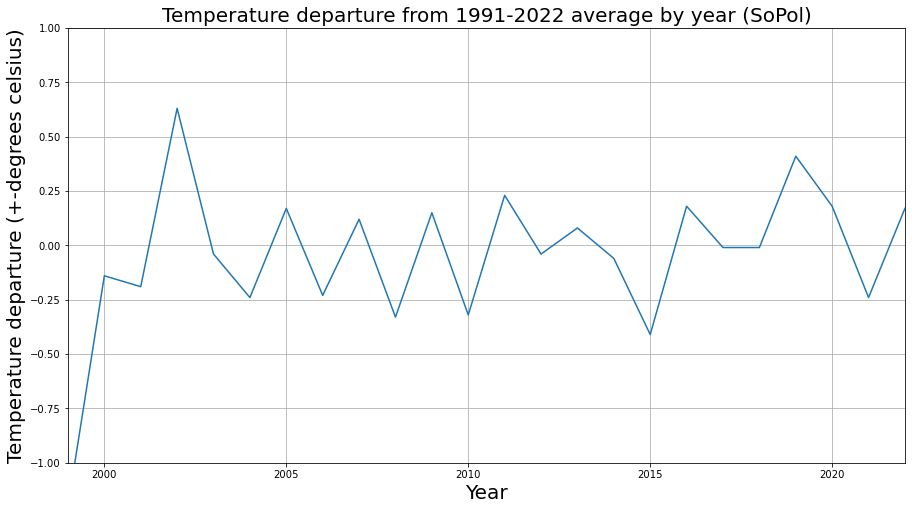

In [9]:
#I've defined 2 functions below that I've used to produce graphs for all 5 regions below, however feel free to use the scatter function to pick a particular region if that is easier to mark

regionTitle = ['Globe','NH','SH','NoPol','SoPol']
def regionList(regionTitle):
    regions = []
    for count in regionTitle:
        regions.append(aggregate_months_overall(filter_by_characteristic(finalData,count)))
    return regions

def visualiser_plot(lst,titles):
    i = 0
    for index in lst:
        scatter(index,titles[i])
        i = i + 1
   
visualiser_plot(regionList(regionTitle),regionTitle)


### Analysis 
We can see that for the total globe, northern hemisphere and southern hemisphere, the trends show an increase in temperature as we move to more recent years. This is in line with recent global warming discussions.

It is also noteable that for regions apart from the south pole, the highest point of recorded temperature occurs in 2016. This is known to be the year of the hottest recorded temperatures in history, largerly due to a powerful el niño at the beginning of the year, as well as the accumulating effects of greenhouse gases over recent years.

Our data for the south pole region are not consistent with our other regions. We see a large spike in temperature in the early 2000s, and then the temperature seems to fluctuate around the +- 0 mark over the remaining years. This spike in temperature around 2002 could be due to the antarctic heat wave that occured in january of that year.


In [10]:
#Similar to part 1, i have defined a function below similar to the aggregate by characteristic, except instead of taking an average across the 12 months, it takes a list of the temperature data for overall per year and returns a dictionary of lists with the year as keys
#This allows us to plot a histogram showing the most common values for the temperature departure from average for any of the regions and categories of our choosing
#This function has a very similar data structure to our aggregate_by_characteristic function from part C

def data_by_characteristic(dataStruct,region,category):    
    assert isinstance(dataStruct,dict), 'dataStructure must be in the form of a 3-level nested dictionary'
    newDict = {}
    for count in dataStruct:
        assert isinstance(dataStruct[count],dict), '2dataStructure must be in the form of a 3-level nested dictionary'
        newList = []
        for i in dataStruct[count]:
            assert isinstance(dataStruct[count][i],dict), '3dataStructure must be in the form of a 3-level nested dictionary'
            tuple3 = 0
            while tuple3 == 0:
                try:
                    oldDict = dataStruct[count][i]
                    tuple3 = oldDict[region]
                    assert isinstance(dataStruct[count][i][region], tuple), 'data entries for region must be in the form of a 3-element tuple'
                    (overall,land,ocean) = tuple3
                    counter = len(newList)
                    while counter == len(newList):
                        if category == 'overall':
                            newList.append(float(overall))
                        elif category == 'land':
                            newList.append(float(land))
                        elif category == 'ocean':
                            newList.append(float(ocean))
                        else:
                            category = input('category invalid. please select either overall, land or ocean:')
                except KeyError:
                    print('region',region,'is not a valid entry')
                    region = input('please provide a new region key to continue:')
#Instead of summing our values of newList like we did in aggregate_by_characteristic, we simply link the list to the year key of the dictionary we return
        newDict[count] = newList
        assert isinstance(newDict,dict), 'Final output should be a dictionary'
        for count in newDict:
            assert isinstance(newDict[count],list), 'each dictionary key should correspond to a single aggregate floating point value'
    return newDict

#We then define a function called histogram which takes a dictionary and a region as an input and produces a histogram
def histogram(filteredData,region):
#Unlike the scatter function, we only need one array of data for our histogram, which is our list of average temperature departure values over the 30 years
    x = []
    for count in filteredData:
        for i in range(len(filteredData[count])):
            x.append(round((filteredData[count][i]),1))
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.hist(x)
    plt.title('Temperature departure from 1991-2022 average per region ('+region+')', fontsize = 20)
    plt.xlabel('Temperature departure from 1991-2022 average (degrees celsius)', fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plt.show()
    plt.show()

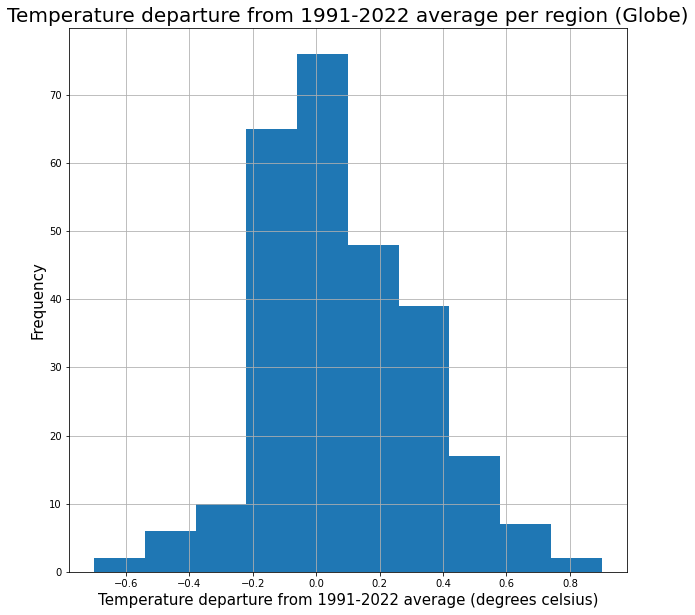

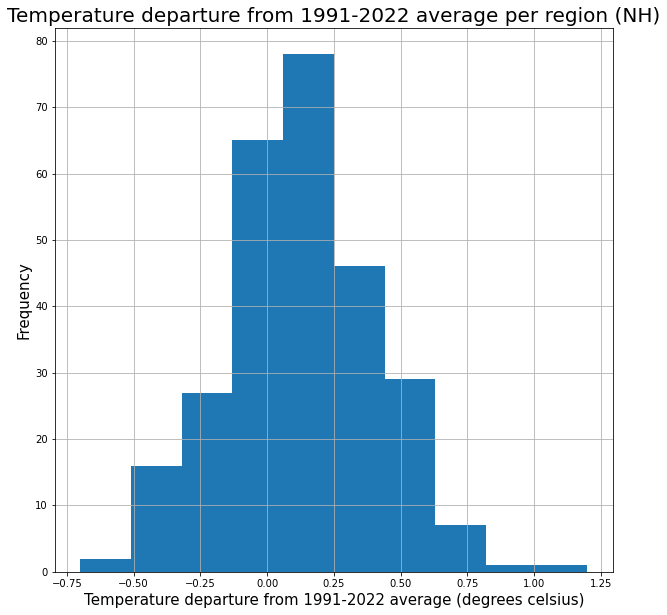

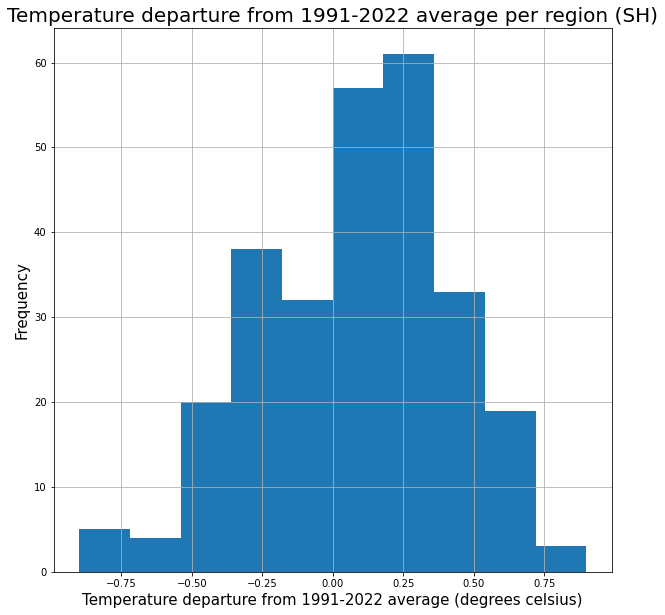

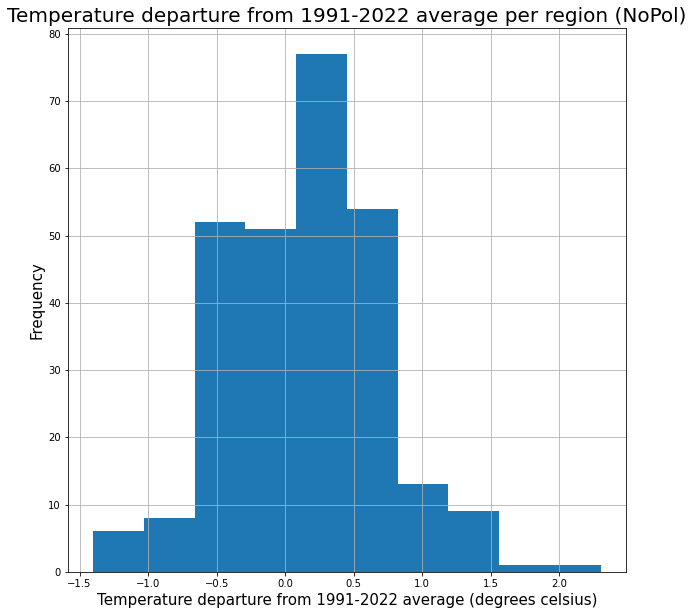

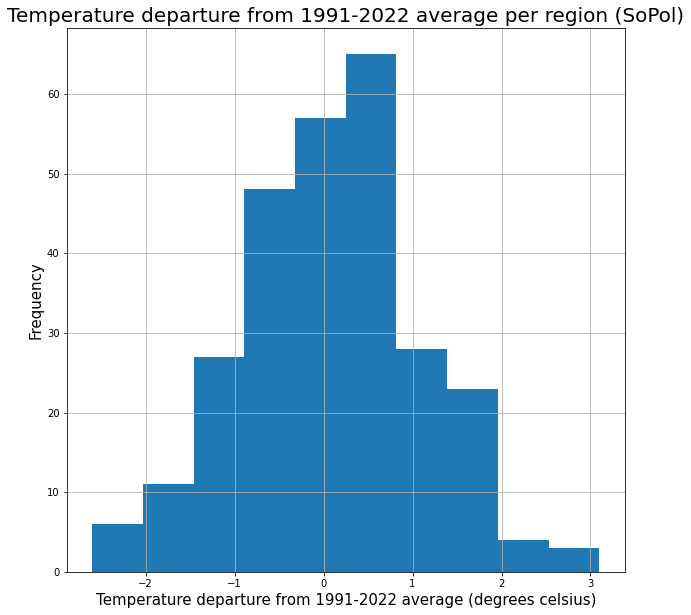

In [11]:
#Below I've shown the histograms for the land temperature data of 5 different regions, but again the histogram function can be used to produce histograms for the overall and ocean data if you want to test it!
def regionList(regionTitle):
    regions = []
    for count in regionTitle:
        regions.append(data_by_characteristic(finalData,count,'land'))
    return regions

def visualiser_histogram(lst,titles):
    i = 0
    for index in lst:
        histogram(index,titles[i])
        i = i + 1
visualiser_histogram(regionList(regionTitle),regionTitle)

### Analysis 

Again, we can see that for all our regions apart form the South Pole, the histogram is clearly shifted to the right of the 0 axis, indicating the frequency of temperatures departures recorded above the average is higher than the frequency of temperature departures lower than the average. This is again in keeping with climate change trends of the last 30 years.

The south pole seems to have a pretty even spread around the average over the last 30 years, perhaps indicating the effects of climate change are lesser around the antartic region.

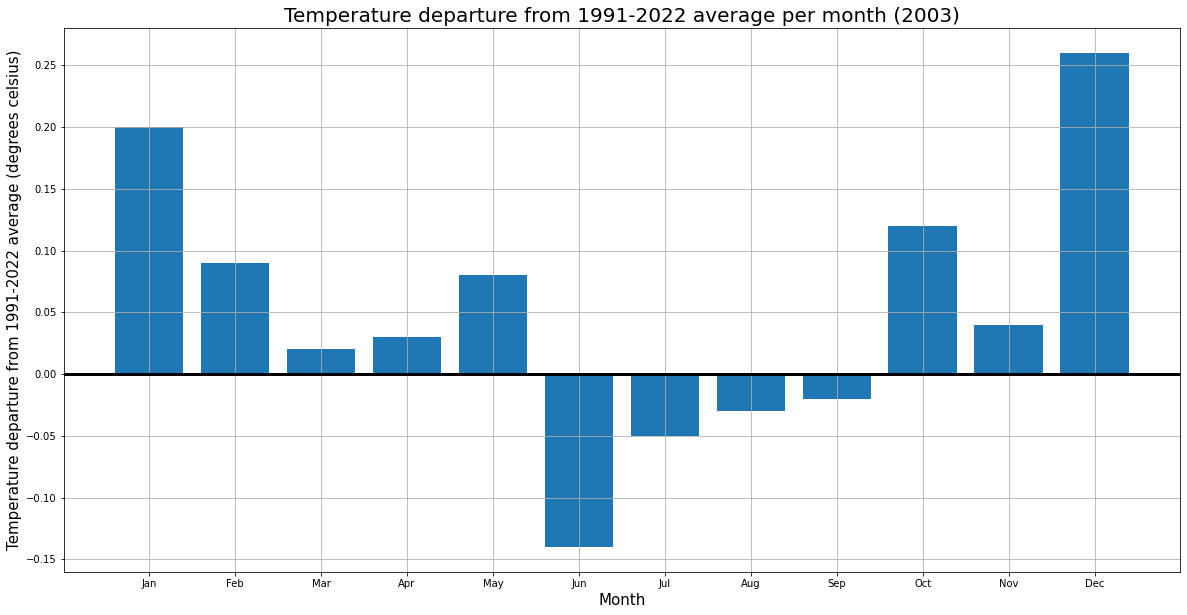

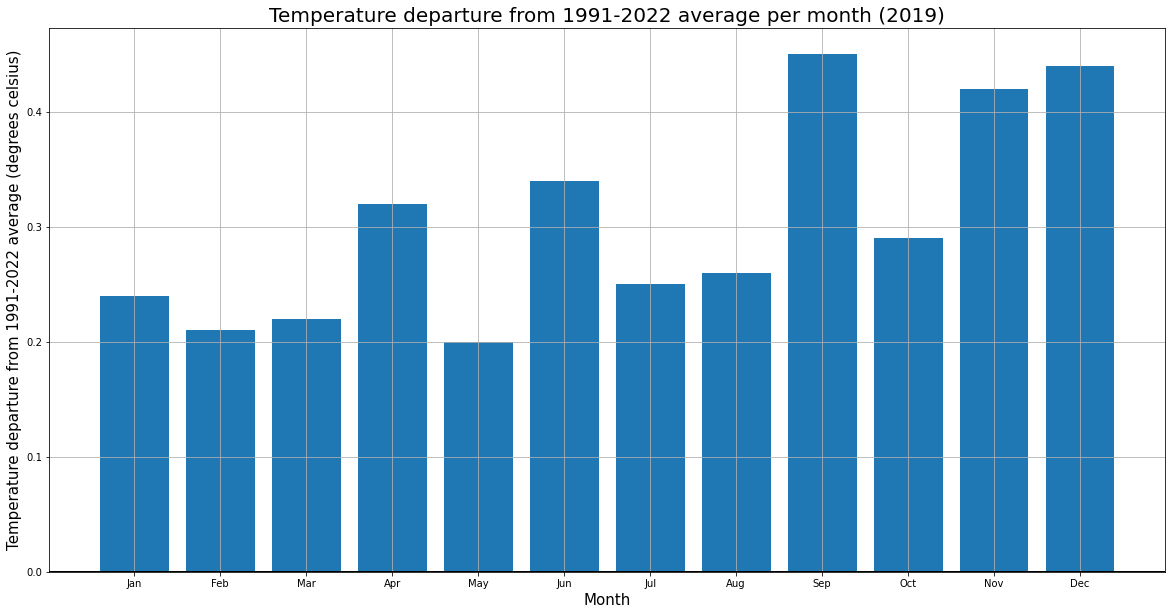

In [12]:
#For my last plot, I've chosen to create bar plots that show how the global temperature departure from average changes month to month for a specified year
#I've defined a function below called 'bar', which takes a set of data (in this case we will use our 'finalData' dataset, as well as a specific year as the arguments)
#It then plots a bar chart for the 12 months of the year
#Note this function does not work for the years 1999 or 2022, since they have less than 12 months of data, which i have accounted for below

def bar(plotSet,year):
#Our if statement will ask the user for a new year input if 1999 or 2022 was given as an argument
    if (year == '1999') or (year == '2022'):
        print('function does not work for 1999 or 2022.')
        year = input('please select a new year:')
    else:
        dicts = filter_by_characteristic(plotSet,'Globe')  
        y = []
        x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#We first add the overall temperatures from each month to a list by accessing the dictionaries and unpacking the tuple
        for count in dicts[year]:
            (overall,land,ocean) = dicts[year][count]
            y.append(float(overall))
#We then plot our bar chart, and add a line at the x = 0 point to distinguish between positive and negative departures from the average temperature
        plt.figure(figsize=(20,10))
        plt.grid()
        plt.bar(x,y)
        plt.axhline(y=0,linewidth=3, color='k')
        plt.title('Temperature departure from 1991-2022 average per month ('+year+')', fontsize = 20)
        plt.ylabel('Temperature departure from 1991-2022 average (degrees celsius)', fontsize = 15)
        plt.xlabel('Month', fontsize = 15)
        plt.show()
        plt.show()
        
#Below i have used our bar function to plot two bar charts for 2003 and 2019
bar(finalData,'2003')
bar(finalData,'2019')

### Analysis 

Above I have plotted 2 bar charts for the years 2003 and 2019 to see how the magnitude of temperature changes change with the month.

First, it is noteable that in 2019, the temperature data for all 12 months show significant positive departures from the average, whilst in 2003, the summer time period shows a negative departure ie. colder than normal, and the other months still show much less temperature increase above the average.

In both graphs, it is also noteable that the biggest temperature departures above average seem to occur in the autumn/winter period (september-december for 2019 and december-january for 2003). Since this is summertime in the southern hemisphere, we can conclude that the southern hemisphere is a bigger contributor to the rising global temperatures than the northern hemisphere.

The use of bar charts has allowed me to compare directly between the months of the year and draw conclusions that i could not have easily identified with other plots. For example, a histogram would not have allowed me to label the months of the year by name, making it less easy to quickly identify seasons. A bar chart also makes the significant increases in positive temperature in recent years more visually jarring, allowing us to more clearly see the impact of climate change in recent years.